In [25]:
from visualization_tools import *
import pandas as pd
import json

In [26]:
try:
   df.head()
except:
    print("df not loaded, loading now")
    run_number = range(1, 33)
    #task = "tensorflow"
    folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps"
    #folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization"
    #folder = "/Users/soren/Work/evolutionary_optimization"
    # Create the DataFrame with ified columns and data types
    df = pd.DataFrame({
        'Experiment name': pd.Series(dtype='string'),
        'Run number': pd.Series(dtype='string'),
        'Individual number': pd.Series(dtype='int64'),
        'Phenotype': pd.Series(dtype='string'),
        'Smart Phenotype': pd.Series(dtype='string'),
        'Fitness': pd.Series(dtype='float64'),
        'Duration': pd.Series(dtype='float64'),
        'Source': pd.Series(dtype='string')
    })


    df_full_eval = load_results(folder)
    df = df_full_eval


df not loaded, loading now
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_0.json 0
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_1.json 1
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_10.json 10
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_11.json 11
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_12.json 12
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_13.json 13
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_14.json 14
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_15.json 15
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1

In [27]:
def f(row):
    #print("########################################################################################################################################################################################")
    #print(f"{row.name}, {row}")
    opt_class = ''
    if row['Full Fitness'] <= 0.15:
        opt_class = 'invalid optimizer'
    else:
        opt_class = 'strong optimizer'
    row['Optimizer Class'] = opt_class
    return row

def f2(row):
    #print("########################################################################################################################################################################################")
    #print(f"{row.name}, {row}")
    opt_class = ''
    if row['Fitness'] <= 0.15:
        opt_class = 'invalid optimizer'
    else:
        opt_class = 'strong optimizer'
    row['Predicted Optimizer Class'] = opt_class
    return row

def f3(row):
    corrected_fitness = row['Fitness']
    if row['source'] == "invalid detection":
        corrected_fitness = 0.1
    row['Fitness'] = corrected_fitness
    return row

def f4(row):
    try:
        if row['source'] == "sanity check":
            row['source'] = "degenerate detection"
    except:
        if row['Source'] == "sanity check":
            row['Source'] = "degenerate detection"
    return row

In [28]:
 # Assuming you already have the DataFrame, let's call it 'df'

# Group by 'Experiment name' and 'Run number', then count the entries in each group
individual_counts = df.groupby(['Experiment name', 'Run number'])['Individual number'].nunique().reset_index(name='Unique Individual Count')
df['Fitness'] = df['Fitness'] * -1

<Figure size 720x432 with 0 Axes>

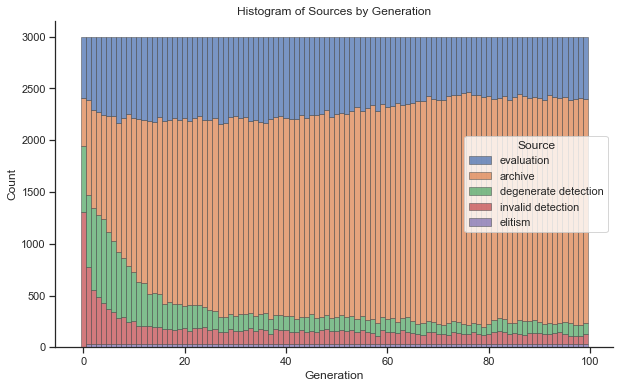

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

df = df.apply(f4, axis=1)
# Ensure 'Generation' is categorical for proper ordering on x-axis
df['Generation'] = df['Generation'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

# Plot histogram with stacked bars
sns.histplot(
    data=df,
    #data=df[df['Source'] == 'elitism'],
    x="Generation",
    hue='Source',
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Histogram of Sources by Generation')
plt.savefig('mechanisms.pdf')
# Show the plot
plt.show()


In [30]:
df_full_eval = pd.read_csv('C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps\\dataframe3.csv')
df_full_eval = df_full_eval[df_full_eval['Full Duration'] != 0.0]
import seaborn as sns

In [31]:
# Create new columns for analysis
df_full_eval['Duration Difference'] = df_full_eval['Full Duration'] - df_full_eval['duration']
df_full_eval['Fitness Difference'] = abs(df_full_eval['Full Fitness'] - df_full_eval['Fitness'])
df_full_eval['Optimizer Class'] = df_full_eval['Full Duration']
df_full_eval['Predicted Optimizer Class'] = df_full_eval['Full Duration']


df_full_eval = df_full_eval.apply(f, axis=1)
df_full_eval = df_full_eval.apply(f2, axis=1)
df_full_eval = df_full_eval.apply(f3, axis=1)
df_full_eval = df_full_eval.apply(f4, axis=1)

AssertionError: 

In [23]:
def get_outliers(df_full_eval):
    outliers = []
    # Some strong optimizers are getting detected as invalid
    foo = [x for x in df_full_eval.loc[(df_full_eval['Optimizer Class'] == 'strong optimizer') & (df_full_eval['source'] == 'invalid detection'), ['Fitness', 'Full Fitness', 'Smart Phenotype']].index]
    outliers.extend(foo)
    print(f"Dropping {len(foo)} outliers")

    # Some strong optimizers are getting detected as degenerate
    foo = [x for x in df_full_eval[(df_full_eval['source'] == 'sanity check') & (df_full_eval['Optimizer Class'] == 'strong optimizer')].index]
    outliers.extend(foo)

    return outliers

#df_full_eval = df_full_eval.drop(get_outliers(df_full_eval))

<Figure size 720x432 with 0 Axes>

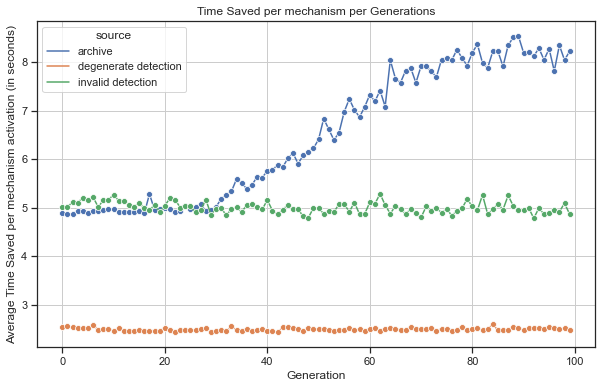

203846

In [24]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

foo_df = df_full_eval[(df_full_eval['source'] == 'archive') | (df_full_eval['source'] == 'invalid detection') | (df_full_eval['source'] == 'degenerate detection')]
grouped_df = foo_df.groupby(['Generation', 'source']).mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Generation', y='Duration Difference', hue='source', marker='o')
plt.title('Time Saved per mechanism per Generations')
plt.xlabel('Generation')
plt.ylabel('Average Time Saved per mechanism activation (in seconds)')
plt.grid(True)
plt.savefig('time_saved.pdf')
plt.show()
df_full_eval.describe()
#grouped_df.loc[(61, 'archive')]
df_full_eval['Duration Difference'].idxmax()


In [9]:
df_full_eval["Fitness Difference"] = abs(df_full_eval['Full Fitness'] - df_full_eval['Fitness'])
df_full_eval.groupby(['Generation']).sum()
fitness_difference_cumsum = df_full_eval.groupby(['Generation']).sum()

def cumsum(fitness_difference_cumsum):
    x = df_full_eval.groupby(['Generation', 'source']).sum()
    def cumsum_instance(row):
        #print("########################################################################################################################################################################################")
        #print(f"{row.name}, {row}")
        row['Fitness Difference'] = np.mean(abs(x.iloc[np.arange(0,row.name + 1)]['Fitness Difference']))
        return row
    return cumsum_instance
f = cumsum(fitness_difference_cumsum)
#print(fitness_difference_cumsum['Fitness Difference'])
fitness_difference_cumsum = fitness_difference_cumsum.apply(f, axis=1)
df_full_eval.groupby(['Generation', 'source']).sum()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
Generation source                                                           
0          archive                 41966558      41966558        41966558   
           degenerate detection    57733073      57733073        57733073   
           evaluation              89223024      89223024        92733488   
           invalid detection      115423093     115423093       115423093   
1          archive                 80749275      80749275        80749275   
...                                     ...           ...             ...   
99         archive                199435188     199435188       199435188   
           degenerate detection    10279159      10279159        10279159   
           elitism                  2772001       2772001         2772001   
           evaluation              98494919      98494919       104222455   
           invalid detection       10248254      10248254        10248254   

                                 Unnamed: 0.1.1.1  Individual number  \
Generation source                                                      
0          archive                       41966558              21243   
           degenerate detection          57733073              24142   
           evaluation                    92733488              27748   
           invalid detection            115423093              48043   
1          archive                       80749275              26337   
...                                           ...                ...   
99         archive                      199435188            3111521   
           degenerate detection          10279159             337111   
           elitism                        2772001              63440   
           evaluation                   104222455            3229999   
           invalid detection             10248254             337663   

                                    Fitness     duration  Full Duration  \
Generation source                                                         
0          archive                22.700000     0.000026    1736.592837   
           degenerate detection   49.600000  1281.697105    2545.088278   
           evaluation             60.455892  4292.677593    4405.253213   
           invalid detection     100.300000     0.021063    5026.668818   
1          archive                41.443419    35.958509    3478.781078   
...                                     ...          ...            ...   
99         archive               613.420907   873.564690   15570.620513   
           degenerate detection    8.400000   214.210390     423.484008   
           elitism                19.210909   463.238531     463.238531   
           evaluation            162.099819  5947.539206    5947.539206   
           invalid detection       8.100000     0.001898     394.591125   

                                 Full Fitness    Difference  \
Generation source                                             
0          archive                  35.158728  1.245873e+01   
           degenerate detection     49.682219  1.688007e-01   
           evaluation               60.455892  0.000000e+00   
           invalid detection        99.980110  9.998011e+01   
1          archive                  70.759565  2.967000e+01   
...                                       ...           ...   
99         archive                 575.582110  7.323174e+01   
           degenerate detection      8.400000  1.251698e-07   
           elitism                  19.210909  0.000000e+00   
           evaluation              162.099819  0.000000e+00   
           invalid detection         8.191055  8.191055e+00   

                                 Accumulated Difference  Duration Difference  \
Generation source                                                              
0          archive                         19904.870836         1.736593e+03   
           degenerate detection            26789.381931   

In [10]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
grouped_df = df_full_eval.groupby(['Generation', 'source']).mean()
# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Generation', y='Fitness Difference', hue='source', marker='o')
plt.title('Mean Fitness Error Across Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness Error')
plt.grid(True)
plt.show()
df_full_eval.describe()

NameError: name 'sns' is not defined

In [11]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

grouped_df = df_full_eval.groupby(['source', 'Optimizer Class']).mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='source', y='Duration Difference', hue='Optimizer Class', marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.describe()
#grouped_df.loc[(61, 'archive')]
df_full_eval['Duration Difference'].idxmax()


NameError: name 'sns' is not defined

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed


df_full_eval[~((df_full_eval['source'] == 'elitism') & (df_full_eval['source'] == 'evaluation'))]
foo_df = df_full_eval[~((df_full_eval['source'] == 'elitism') | (df_full_eval['source'] == 'evaluation'))]
grouped_df = foo_df.groupby(['source', 'Optimizer Class']).mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(data=foo_df, x='source', y='Fitness Difference', hue='Optimizer Class')
plt.title('Mean Fitness Error commited by each evaluation method.')
plt.xlabel('Evaluation Method')
plt.ylabel('Mean Fitness Error')
plt.grid(True)
plt.show()
df_full_eval.loc[:,['Optimizer Class', 'Predicted Optimizer Class']]

KeyboardInterrupt: 

<Figure size 1440x432 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
labels = df_full_eval['Optimizer Class'].unique()

def print_mechanism_stats(df_full_eval, mechanism = None, labels = None):
    if mechanism != None:
        working_df = df_full_eval[df_full_eval['source'] == mechanism]
    else:
        working_df = df_full_eval
    print(f"Classification report for {mechanism}")
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")
    print(classification_report(working_df['Optimizer Class'], working_df['Predicted Optimizer Class']))

def make_confusion_matrix(df_full_eval, mechanism = None, labels = None):
    if mechanism != None:
        working_df = df_full_eval[df_full_eval['source'] == mechanism]
    else:
        working_df = df_full_eval
    plt.figure(figsize=(8,6), dpi=100)
    #print(f"Classification report for {mechanism}")
    #print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")
    #print(classification_report(working_df['Optimizer Class'], working_df['Predicted Optimizer Class']))
    cm = confusion_matrix(working_df['Optimizer Class'], working_df['Predicted Optimizer Class'], labels=labels)

    #normalize
    max_cm = sum(sum(cm))
    cm = cm / max_cm

    ax = sns.heatmap(cm, annot=True, fmt='f', )

    ax.set_xlabel("Predicted Optimizer Class", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(labels)

    # set y-axis label and ticks
    ax.set_ylabel("Actual Optimizer Class", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(labels)

    if mechanism == None:
        # set plot title
        ax.set_title(f"Confusion Matrix for the Optimizer Class Prediction ({max_cm} observations)", fontsize=14, pad=20)
    else:
        ax.set_title(f"Confusion Matrix for {mechanism} Optimizer Class Prediction ({max_cm} observations)", fontsize=14, pad=20)

    plt.show()


In [17]:
for mechanism in df_full_eval['source'].unique():
    print_mechanism_stats(df_full_eval=df_full_eval, mechanism=mechanism, labels=labels)

Classification report for elitism
Total time saved by elitism: 0.043858002026875946 in hours
                   precision    recall  f1-score   support

invalid optimizer       1.00      1.00      1.00        42
 strong optimizer       1.00      1.00      1.00      2286

         accuracy                           1.00      2328
        macro avg       1.00      1.00      1.00      2328
     weighted avg       1.00      1.00      1.00      2328

Classification report for archive
Total time saved by archive: 286.4620617744969 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.97      0.89      0.93    121688
 strong optimizer       0.69      0.89      0.77     33226

         accuracy                           0.89    154914
        macro avg       0.83      0.89      0.85    154914
     weighted avg       0.91      0.89      0.89    154914

Classification report for evaluation
Total time saved by evaluation: 0.5379046367936664 in hours
      

c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\env

Classification report for invalid detection
Total time saved by invalid detection: 16.82135991891225 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.98      1.00      0.99     11772
 strong optimizer       0.00      0.00      0.00       277

         accuracy                           0.98     12049
        macro avg       0.49      0.50      0.49     12049
     weighted avg       0.95      0.98      0.97     12049



c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


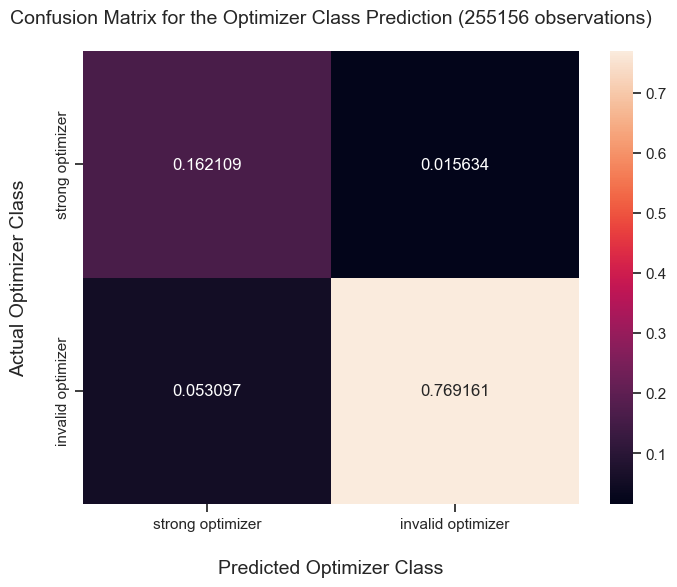

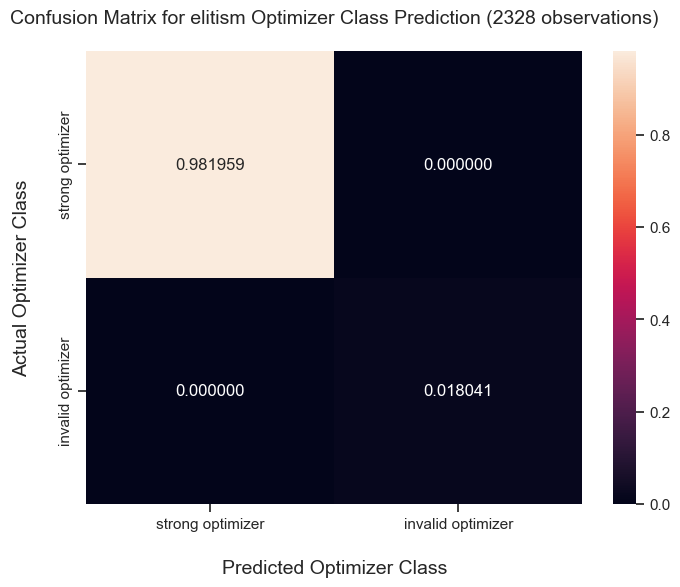

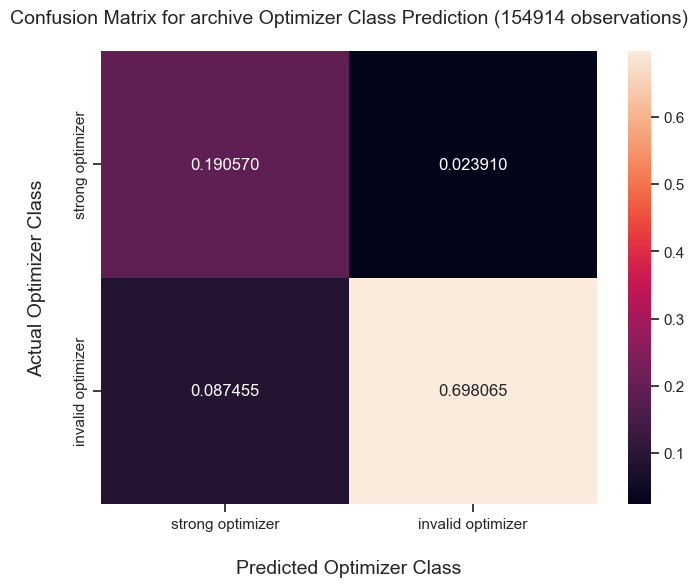

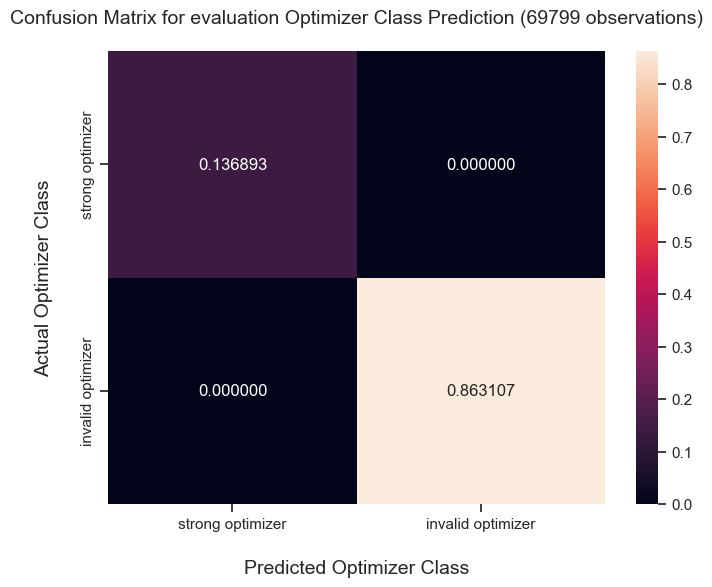

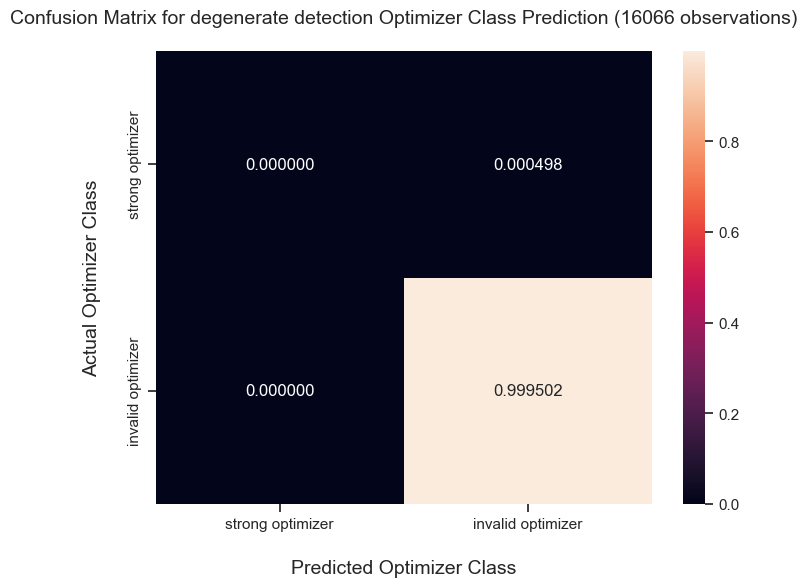

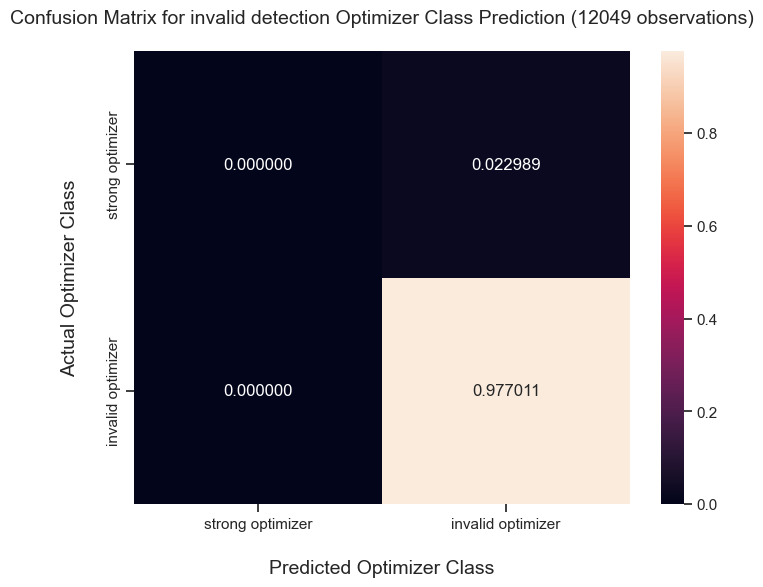

In [18]:
from sklearn.preprocessing import normalize


make_confusion_matrix(df_full_eval=df_full_eval, labels=labels)
for mechanism in df_full_eval['source'].unique():
    make_confusion_matrix(df_full_eval=df_full_eval, mechanism=mechanism, labels=labels)

In [19]:
len(df_full_eval[df_full_eval['Optimizer Class'] != df_full_eval['Predicted Optimizer Class']])


17537

In [20]:
df_full_eval[df_full_eval['source'] == "invalid detection"]['Full Fitness']

99        0.100000
195       0.100000
299       0.085345
392       0.092382
398       0.153636
            ...   
234894    0.077509
234896    0.098618
234996    0.100000
234998    0.100000
234999    0.100000
Name: Full Fitness, Length: 12049, dtype: float64

In [32]:
for mechanism in df_full_eval['source'].unique():
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")

for mechanism in df_full_eval.loc[df_full_eval['Generation'] <= 5, 'source'].unique():
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[(df_full_eval['source'] == mechanism) & (df_full_eval['Generation'] <= 5), 'Duration Difference'].sum() / 60 / 60} in hours")

print(f"{(df_full_eval['Full Duration'].sum()) / 60 / 60} ")
print(f"{(df_full_eval['Duration Difference'].sum()) / 60 / 60}")
print(f"{(df_full_eval['duration'].sum()) / 60 / 60}")
print(f"{(df_full_eval['Duration Difference'].sum() / (df_full_eval['Full Duration'].sum()))}")


Total time saved by elitism: 0.043858002026875946 in hours
Total time saved by archive: 286.4620617744969 in hours
Total time saved by evaluation: 0.5379046367936664 in hours
Total time saved by degenerate detection: 11.186412857903374 in hours
Total time saved by invalid detection: 16.82135991891225 in hours
Total time saved by elitism: 0.012530857721964515 in hours
Total time saved by evaluation: 0.10519559966193305 in hours
Total time saved by archive: 5.943948409689797 in hours
Total time saved by degenerate detection: 2.446573240227169 in hours
Total time saved by invalid detection: 3.9845873877074984 in hours
514.9152866330722 
315.05159719013307
199.86368944293923
0.6118513187871975


: 

In [22]:
print(df_full_eval.columns)
df_full_eval['Unique ID'] = df_full_eval['Individual number']
observed_phenotypes = {}
u_id = 0
for ix, row in df_full_eval.iterrows():
    if not row['Smart Phenotype'] in observed_phenotypes:
        observed_phenotypes[row['Smart Phenotype']] = u_id
        u_id += 1
    row['Unique ID'] = observed_phenotypes[row['Smart Phenotype']]

def function_with_observed_phenotypes(observed_phenotypes):
    def f(row):
        observed_phenotypes_in = observed_phenotypes
        row['Unique ID'] = observed_phenotypes_in[row['Smart Phenotype']]
        return row
    return f

df_full_eval.apply(function_with_observed_phenotypes(observed_phenotypes), axis=1)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Experiment name', 'Run number', 'Individual number', 'Generation',
       'Phenotype', 'Smart Phenotype', 'Fitness', 'source', 'duration',
       'Full Duration', 'Full Fitness', 'Difference', 'Accumulated Difference',
       'Duration Difference', 'Fitness Difference', 'Optimizer Class',
       'Predicted Optimizer Class'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,...,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Optimizer Class,Predicted Optimizer Class,Unique ID
0,0,0,0,0,evolutionary_optimization,run_6,1004,52,"alpha_func, beta_func, sigma_func, grad_func =...","multiply(add(grad, add(square(constant(1.24647...",...,23.472121,23.472121,0.805855,0.000000,0.000000,0.000000e+00,0.000000,strong optimizer,strong optimizer,0
1,1,1,1,1,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",...,0.000000,6.357260,0.105509,0.023600,0.023600,6.357260e+00,0.023600,invalid optimizer,invalid optimizer,1
2,2,2,2,2,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",...,0.000000,5.270779,0.100000,0.029109,0.052709,5.270779e+00,0.029109,invalid optimizer,invalid optimizer,1
3,3,3,3,3,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",...,0.000000,4.802348,0.048745,0.080364,0.133073,4.802348e+00,0.080364,invalid optimizer,invalid optimizer,1
4,4,4,4,4,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",...,0.000000,4.757688,0.135891,0.006782,0.139855,4.757688e+00,0.006782,invalid optimizer,invalid optimizer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255151,255151,255151,299986,299986,evolutionary_optimization,run_13,5248,85,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(multiply(sigma, constant(9.71677...",...,7.032546,7.032546,0.089673,0.000000,73.692780,0.000000e+00,0.000000,invalid optimizer,invalid optimizer,85561
255152,255152,255152,299987,299987,evolutionary_optimization,run_13,5307,85,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(multiply(grad, constant(0.0)), a...",...,6.513700,6.513700,0.087164,0.000000,73.692780,-8.881784e-16,0.000000,invalid optimizer,invalid optimizer,85562
255153,255153,255153,299992,299992,evolutionary_optimization,run_13,5273,85,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(multiply(grad, constant(5.072436...",...,7.130269,7.130269,0.065182,0.000000,73.692780,0.000000e+00,0.000000,invalid optimizer,invalid optimizer,85563
255154,255154,255154,299993,299993,evolutionary_optimization,run_13,5256,85,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(constant(5.07243606e-02), add(be...",...,6.850614,6.850614,0.052636,0.000000,73.692780,0.000000e+00,0.000000,invalid optimizer,invalid optimizer,85564


In [23]:
df_full_eval[(df_full_eval['Optimizer Class'] == 'strong optimizer') & (df_full_eval['Predicted Optimizer Class'] == 'invalid optimizer')].loc[:, ["Experiment name", "Run number", "Individual number", "Generation", "Phenotype", "Unique ID"]]
df_full_eval.to_csv("new_dataframe.csv")

In [24]:
df_full_eval[(df_full_eval['Optimizer Class'] == 'strong optimizer') & (df_full_eval['Predicted Optimizer Class'] == 'invalid optimizer')].loc[:, ["Unique ID"]]['Unique ID'].unique()

array([ 189,  878,  333,  159, 1379,  971,  321,  286,  412,    4,   41,
        410, 1027,  181,   89,  970,  677,  328,  184, 1205, 1976, 1732,
       1308,  756, 1326, 1587,  255, 1817, 1804, 1384, 1653, 1783,    8,
       2002, 1068, 1251, 1370, 1413,  988, 1689, 1181,  216,  323,   25,
        955, 1929, 1239, 1083, 1158,  238, 1656,  575, 1385, 1138, 1281,
       1492,  589,  752, 1461,    3, 1779, 2149,  326,  770, 2401, 2501,
       3586,  618, 2051, 2087, 1466, 1322,  359, 1847, 1838,  462,  733,
       1389, 1998, 3029, 1442, 1954,  938, 2107, 1723, 1197,  631, 1878,
       1928, 1600, 2392, 2785, 3467,  479, 1496, 2617, 2198, 2280, 1311,
       2287, 1822, 1845, 1757,  886, 2731,  537, 1287,   47, 2059, 2091,
       2101, 1253, 2826, 2370, 2235, 2486, 2211, 2410, 1146,  193,  201,
       3261, 1227, 2463,  724, 2513,  802, 2106, 1786, 1303,  681, 3344,
       1278, 1183, 2276, 2934, 1959, 1639,  351,  991, 1833, 1623, 1258,
       1449, 1797, 1428, 1611,  755, 2990,   29, 26